## Dataset preparation from online for custom YOLO

In [1]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(os.path.dirname(original_path),'downloads')
response = google_images_download.googleimagesdownload()
search_queries = ['picture with dogs']

In [2]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    output_directory=data_path,
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    silent_mode=True)   
    response.download(arguments)                          

In [3]:
download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 807 is all we got for this search filter!
Downloaded 807 picture with dogs images!


In [4]:
working_dir = os.path.join(data_path,'picture with dogs')
os.chdir(working_dir)
current_list = os.listdir(os.getcwd())
for i in range(len(os.listdir(working_dir))):
    original_name = current_list[i]
    new_name = "".join('picture with dogs'.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
    if not os.path.exists(new_name):
        os.rename(original_name,new_name)
os.chdir(original_path)

## labelimg_v1.8.0 ([source](https://github.com/tzutalin/labelImg))
<p align="center">
<img src="../Readme_images/custom_YOLO_labelling_example.png" width="700"></p>
</p>

## Import modules

In [5]:
from darkflow.net.build import TFNet
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import load_model
import datetime as dt
import time

Using TensorFlow backend.


## Config custom darkflow

In [6]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('cfg','yolov2_hddv2.cfg'), ## for custom model
        'load':os.path.join('bin','yolov2.weights'),
        'epoch':100,
        'batch':4,
        'train':True,
        'dataset':os.path.join('..','downloads','picture with dogs'),
        'annotation':os.path.join('..','downloads','picture with dogs-annot'),
        'gpu':0.8
    }
    tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg\yolov2_hddv2.cfg
Loading bin\yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.016955137252807617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      

In [ ]:
tfnet.train()


cfg\yolov2_hddv2.cfg parsing ..\downloads\picture with dogs-annot
Parsing for ['d', 'f'] 
[====================>]100%  picturewithdogs_0499.xml
Statistics:
d: 591
f: 389
Dataset size: 417
Dataset of 417 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 4
	Epoch number  : 100
	Backup every  : 2000
step 1 - loss 225.83059692382812 - moving ave loss 225.83059692382812
step 2 - loss 223.7509002685547 - moving ave loss 225.62262725830078
step 3 - loss 222.00100708007812 - moving ave loss 225.26046524047854
step 4 - loss 220.34732055664062 - moving ave loss 224.76915077209475
step 5 - loss 221.02969360351562 - moving ave loss 224.39520505523683
step 6 - loss 219.89813232421875 - moving ave loss 223.94549778213502
step 7 - loss 215.83033752441406 - moving ave loss 223.1339817563629
step 8 - loss 216.13003540039062 - moving ave loss 222.4335871207657
step 9 - loss 215.42120361328125 - moving ave loss 221.73234877001727
step 10 - loss 215.49819946289062 - moving ave los

step 113 - loss 131.57879638671875 - moving ave loss 140.1112129666236
step 114 - loss 131.18466186523438 - moving ave loss 139.2185578564847
step 115 - loss 130.24526977539062 - moving ave loss 138.3212290483753
step 116 - loss 130.5028076171875 - moving ave loss 137.53938690525652
step 117 - loss 127.533935546875 - moving ave loss 136.53884176941838
step 118 - loss 125.7127456665039 - moving ave loss 135.45623215912696
step 119 - loss 128.5934295654297 - moving ave loss 134.76995189975722
step 120 - loss 126.74920654296875 - moving ave loss 133.96787736407836
step 121 - loss 126.38910675048828 - moving ave loss 133.21000030271935
step 122 - loss 129.4287872314453 - moving ave loss 132.83187899559195
step 123 - loss 124.10839080810547 - moving ave loss 131.95953017684332
step 124 - loss 122.29718780517578 - moving ave loss 130.99329593967656
step 125 - loss 124.15605163574219 - moving ave loss 130.30957150928313
step 126 - loss 124.51319885253906 - moving ave loss 129.7299342436087
st

step 230 - loss 60.80943298339844 - moving ave loss 66.30093711437948
step 231 - loss 62.62528610229492 - moving ave loss 65.93337201317102
step 232 - loss 65.71125793457031 - moving ave loss 65.91116060531095
step 233 - loss 63.06639099121094 - moving ave loss 65.62668364390096
step 234 - loss 62.15263366699219 - moving ave loss 65.27927864621009
step 235 - loss 59.36199188232422 - moving ave loss 64.6875499698215
step 236 - loss 58.761444091796875 - moving ave loss 64.09493938201905
step 237 - loss 58.8128547668457 - moving ave loss 63.56673092050171
step 238 - loss 60.682037353515625 - moving ave loss 63.2782615638031
step 239 - loss 60.291404724121094 - moving ave loss 62.9795758798349
step 240 - loss 57.984622955322266 - moving ave loss 62.48008058738363
step 241 - loss 58.05397415161133 - moving ave loss 62.0374699438064
step 242 - loss 59.47113800048828 - moving ave loss 61.78083674947459
step 243 - loss 55.81706237792969 - moving ave loss 61.1844593123201
step 244 - loss 57.402

step 346 - loss 31.295650482177734 - moving ave loss 33.98164791514201
step 347 - loss 31.006895065307617 - moving ave loss 33.68417263015857
step 348 - loss 34.934574127197266 - moving ave loss 33.80921277986244
step 349 - loss 31.08214569091797 - moving ave loss 33.536506070967995
step 350 - loss 31.19610595703125 - moving ave loss 33.30246605957432
step 351 - loss 32.35698699951172 - moving ave loss 33.20791815356806
step 352 - loss 30.02875518798828 - moving ave loss 32.890001857010084
step 353 - loss 29.916156768798828 - moving ave loss 32.59261734818896
step 354 - loss 29.806922912597656 - moving ave loss 32.31404790462983
step 355 - loss 37.063785552978516 - moving ave loss 32.7890216694647
step 356 - loss 29.192066192626953 - moving ave loss 32.42932612178093
step 357 - loss 34.658775329589844 - moving ave loss 32.65227104256182
step 358 - loss 29.272842407226562 - moving ave loss 32.314328179028294
step 359 - loss 29.682373046875 - moving ave loss 32.051132665812965
step 360 -

step 461 - loss 22.197368621826172 - moving ave loss 18.090491175586042
step 462 - loss 15.586487770080566 - moving ave loss 17.840090835035493
step 463 - loss 16.337486267089844 - moving ave loss 17.68983037824093
step 464 - loss 15.23950481414795 - moving ave loss 17.44479782183163
step 465 - loss 17.03293800354004 - moving ave loss 17.403611840002473
step 466 - loss 16.679264068603516 - moving ave loss 17.33117706286258
step 467 - loss 22.08642578125 - moving ave loss 17.806701934701323
step 468 - loss 15.569900512695312 - moving ave loss 17.58302179250072
step 469 - loss 18.68350601196289 - moving ave loss 17.693070214446937
step 470 - loss 15.112552642822266 - moving ave loss 17.43501845728447
step 471 - loss 15.829608917236328 - moving ave loss 17.274477503279655
step 472 - loss 18.590744018554688 - moving ave loss 17.40610415480716
step 473 - loss 14.718557357788086 - moving ave loss 17.137349475105253
step 474 - loss 16.201011657714844 - moving ave loss 17.043715693366213
step 

step 576 - loss 8.3072509765625 - moving ave loss 10.09154236865614
step 577 - loss 9.002897262573242 - moving ave loss 9.98267785804785
step 578 - loss 9.941214561462402 - moving ave loss 9.978531528389306
step 579 - loss 8.772945404052734 - moving ave loss 9.85797291595565
step 580 - loss 10.8387451171875 - moving ave loss 9.956050136078835
step 581 - loss 11.344583511352539 - moving ave loss 10.094903473606205
step 582 - loss 9.33869457244873 - moving ave loss 10.019282583490458
step 583 - loss 8.180845260620117 - moving ave loss 9.835438851203426
step 584 - loss 9.642202377319336 - moving ave loss 9.816115203815016
step 585 - loss 8.345123291015625 - moving ave loss 9.669016012535078
step 586 - loss 13.207598686218262 - moving ave loss 10.022874279903396
step 587 - loss 7.821922779083252 - moving ave loss 9.802779129821383
step 588 - loss 7.285243034362793 - moving ave loss 9.551025520275523
step 589 - loss 7.586980819702148 - moving ave loss 9.354621050218185
step 590 - loss 9.743

step 693 - loss 5.507383823394775 - moving ave loss 6.02892940145396
step 694 - loss 6.583871841430664 - moving ave loss 6.08442364545163
step 695 - loss 7.705162048339844 - moving ave loss 6.246497485740451
step 696 - loss 6.159436225891113 - moving ave loss 6.2377913597555175
step 697 - loss 4.961912155151367 - moving ave loss 6.110203439295103
step 698 - loss 6.043938636779785 - moving ave loss 6.103576959043571
step 699 - loss 5.505110263824463 - moving ave loss 6.043730289521661
step 700 - loss 5.938255310058594 - moving ave loss 6.033182791575355
step 701 - loss 5.447812080383301 - moving ave loss 5.97464572045615
step 702 - loss 5.458784103393555 - moving ave loss 5.92305955874989
step 703 - loss 5.919835090637207 - moving ave loss 5.9227371119386225
step 704 - loss 6.970316410064697 - moving ave loss 6.02749504175123
step 705 - loss 6.7558698654174805 - moving ave loss 6.100332524117855
step 706 - loss 5.064125061035156 - moving ave loss 5.996711777809585
step 707 - loss 6.4339

step 810 - loss 3.998964786529541 - moving ave loss 4.559796600507638
step 811 - loss 3.705540657043457 - moving ave loss 4.47437100616122
step 812 - loss 5.124452114105225 - moving ave loss 4.539379116955621
step 813 - loss 4.109519958496094 - moving ave loss 4.496393201109669
step 814 - loss 4.697258949279785 - moving ave loss 4.516479775926681
step 815 - loss 5.606266975402832 - moving ave loss 4.625458495874296
step 816 - loss 3.800902843475342 - moving ave loss 4.543002930634401
step 817 - loss 3.3256447315216064 - moving ave loss 4.421267110723122
step 818 - loss 4.47719144821167 - moving ave loss 4.426859544471976
step 819 - loss 5.028814792633057 - moving ave loss 4.487055069288084
step 820 - loss 5.628376007080078 - moving ave loss 4.601187163067284
step 821 - loss 3.9330267906188965 - moving ave loss 4.534371125822445
step 822 - loss 5.464275360107422 - moving ave loss 4.627361549250943
step 823 - loss 4.294427871704102 - moving ave loss 4.594068181496259
step 824 - loss 5.48

step 927 - loss 2.961170196533203 - moving ave loss 4.011318533104034
step 928 - loss 3.4089486598968506 - moving ave loss 3.9510815457833157
step 929 - loss 3.299473524093628 - moving ave loss 3.885920743614347
step 930 - loss 3.8540830612182617 - moving ave loss 3.8827369753747383
step 931 - loss 5.918905258178711 - moving ave loss 4.086353803655135
step 932 - loss 2.3664088249206543 - moving ave loss 3.9143593057816872
step 933 - loss 4.256717681884766 - moving ave loss 3.9485951433919952
step 934 - loss 4.5001630783081055 - moving ave loss 4.0037519368836065
step 935 - loss 2.8229527473449707 - moving ave loss 3.885672017929743
step 936 - loss 3.9650144577026367 - moving ave loss 3.893606261907032
Finish 9 epoch(es)
step 937 - loss 3.321537494659424 - moving ave loss 3.8363993851822715
step 938 - loss 5.909560203552246 - moving ave loss 4.043715467019269
step 939 - loss 3.993856191635132 - moving ave loss 4.038729539480856
step 940 - loss 2.2010393142700195 - moving ave loss 3.8549

step 1041 - loss 4.148282051086426 - moving ave loss 3.7020554990850605
step 1042 - loss 2.7410731315612793 - moving ave loss 3.6059572623326823
step 1043 - loss 2.8346879482269287 - moving ave loss 3.528830330922107
step 1044 - loss 2.251905918121338 - moving ave loss 3.4011378896420306
step 1045 - loss 5.86025857925415 - moving ave loss 3.6470499586032425
step 1046 - loss 3.2259294986724854 - moving ave loss 3.604937912610167
step 1047 - loss 2.2089028358459473 - moving ave loss 3.465334404933745
step 1048 - loss 2.8367581367492676 - moving ave loss 3.402476778115297
step 1049 - loss 4.114494800567627 - moving ave loss 3.47367858036053
step 1050 - loss 2.9901299476623535 - moving ave loss 3.4253237170907123
step 1051 - loss 3.0299460887908936 - moving ave loss 3.3857859542607303
step 1052 - loss 2.959653377532959 - moving ave loss 3.343172696587953
step 1053 - loss 3.5309152603149414 - moving ave loss 3.3619469529606523
step 1054 - loss 2.7827272415161133 - moving ave loss 3.30402498

step 1155 - loss 4.843657970428467 - moving ave loss 3.6869346946775576
step 1156 - loss 3.3229520320892334 - moving ave loss 3.650536428418725
step 1157 - loss 3.0488011837005615 - moving ave loss 3.590362903946909
step 1158 - loss 2.5933728218078613 - moving ave loss 3.4906638957330047
step 1159 - loss 2.1625680923461914 - moving ave loss 3.3578543153943237
step 1160 - loss 5.148775100708008 - moving ave loss 3.5369463939256924
step 1161 - loss 2.981757164001465 - moving ave loss 3.4814274709332698
step 1162 - loss 4.114577770233154 - moving ave loss 3.5447425008632583
step 1163 - loss 3.801114320755005 - moving ave loss 3.5703796828524332
step 1164 - loss 2.900435209274292 - moving ave loss 3.503385235494619
step 1165 - loss 7.294305324554443 - moving ave loss 3.8824772444006017
step 1166 - loss 2.0728554725646973 - moving ave loss 3.701515067217011
step 1167 - loss 3.9528911113739014 - moving ave loss 3.7266526716327
step 1168 - loss 7.896454334259033 - moving ave loss 4.1436328378

step 1269 - loss 4.188080787658691 - moving ave loss 3.5817315549314808
step 1270 - loss 2.8872647285461426 - moving ave loss 3.512284872292947
step 1271 - loss 1.5785351991653442 - moving ave loss 3.318909904980187
step 1272 - loss 2.9423303604125977 - moving ave loss 3.281251950523428
step 1273 - loss 3.467595100402832 - moving ave loss 3.2998862655113688
step 1274 - loss 2.2315354347229004 - moving ave loss 3.193051182432522
step 1275 - loss 2.7987143993377686 - moving ave loss 3.153617504123047
step 1276 - loss 3.20999813079834 - moving ave loss 3.1592555667905766
step 1277 - loss 1.6684141159057617 - moving ave loss 3.010171421702095
step 1278 - loss 3.366804361343384 - moving ave loss 3.045834715666224
step 1279 - loss 5.957459926605225 - moving ave loss 3.3369972367601246
step 1280 - loss 3.767458200454712 - moving ave loss 3.3800433331295836
step 1281 - loss 2.614224672317505 - moving ave loss 3.303461467048376
step 1282 - loss 3.3965370655059814 - moving ave loss 3.31276902689

step 1383 - loss 3.1526694297790527 - moving ave loss 3.0331474753976195
step 1384 - loss 2.468287944793701 - moving ave loss 2.9766615223372277
step 1385 - loss 2.803927183151245 - moving ave loss 2.95938808841863
step 1386 - loss 3.8027303218841553 - moving ave loss 3.0437223117651824
step 1387 - loss 2.402069330215454 - moving ave loss 2.9795570136102096
step 1388 - loss 2.0991992950439453 - moving ave loss 2.8915212417535834
step 1389 - loss 3.063349723815918 - moving ave loss 2.908704089959817
step 1390 - loss 2.7932381629943848 - moving ave loss 2.897157497263274
step 1391 - loss 3.2594289779663086 - moving ave loss 2.9333846453335775
step 1392 - loss 3.334171772003174 - moving ave loss 2.973463358000537
step 1393 - loss 3.1413276195526123 - moving ave loss 2.9902497841557447
step 1394 - loss 4.827454566955566 - moving ave loss 3.173970262435727
step 1395 - loss 2.2424774169921875 - moving ave loss 3.080820977891373
step 1396 - loss 3.1171061992645264 - moving ave loss 3.08444950

step 1497 - loss 2.5779218673706055 - moving ave loss 2.8276062321418225
step 1498 - loss 4.439919471740723 - moving ave loss 2.9888375561017124
step 1499 - loss 3.3830790519714355 - moving ave loss 3.028261705688685
step 1500 - loss 2.146759033203125 - moving ave loss 2.940111438440129
Checkpoint at step 1500
step 1501 - loss 4.158502101898193 - moving ave loss 3.0619505047859352
step 1502 - loss 2.9034547805786133 - moving ave loss 3.046100932365203
step 1503 - loss 2.1348838806152344 - moving ave loss 2.954979227190206
step 1504 - loss 2.1072168350219727 - moving ave loss 2.870202987973383
step 1505 - loss 5.597270488739014 - moving ave loss 3.1429097380499464
step 1506 - loss 2.9711852073669434 - moving ave loss 3.1257372849816463
step 1507 - loss 2.693972110748291 - moving ave loss 3.082560767558311
step 1508 - loss 1.6455814838409424 - moving ave loss 2.9388628391865743
step 1509 - loss 2.795903205871582 - moving ave loss 2.924566875855075
step 1510 - loss 2.5514070987701416 - mo

step 1611 - loss 2.3008949756622314 - moving ave loss 2.821221637879593
step 1612 - loss 4.691558837890625 - moving ave loss 3.0082553578806963
step 1613 - loss 2.3544728755950928 - moving ave loss 2.942877109652136
step 1614 - loss 3.17681884765625 - moving ave loss 2.9662712834525475
step 1615 - loss 3.468472719192505 - moving ave loss 3.0164914270265433
step 1616 - loss 3.0622329711914062 - moving ave loss 3.0210655814430294
step 1617 - loss 3.3172688484191895 - moving ave loss 3.0506859081406454
step 1618 - loss 1.201383113861084 - moving ave loss 2.865755628712689
step 1619 - loss 3.73934006690979 - moving ave loss 2.9531140725323994
step 1620 - loss 2.747608184814453 - moving ave loss 2.932563483760605
step 1621 - loss 1.7488558292388916 - moving ave loss 2.814192718308434
step 1622 - loss 1.9808564186096191 - moving ave loss 2.7308590883385526
step 1623 - loss 2.522026538848877 - moving ave loss 2.709975833389585
step 1624 - loss 2.061842679977417 - moving ave loss 2.64516251804

step 1725 - loss 3.4661545753479004 - moving ave loss 3.5416973597405725
step 1726 - loss 3.277493476867676 - moving ave loss 3.515276971453283
step 1727 - loss 3.232612133026123 - moving ave loss 3.4870104876105676
step 1728 - loss 2.810894727706909 - moving ave loss 3.4193989116202017
step 1729 - loss 2.1298828125 - moving ave loss 3.2904473017081814
step 1730 - loss 2.0299391746520996 - moving ave loss 3.164396489002573
step 1731 - loss 3.705423355102539 - moving ave loss 3.2184991756125694
step 1732 - loss 3.4935033321380615 - moving ave loss 3.2459995912651185
step 1733 - loss 1.9032021760940552 - moving ave loss 3.1117198497480123
step 1734 - loss 3.174590826034546 - moving ave loss 3.118006947376666
step 1735 - loss 3.652911424636841 - moving ave loss 3.1714973951026835
step 1736 - loss 2.343353271484375 - moving ave loss 3.0886829827408526
step 1737 - loss 2.178842067718506 - moving ave loss 2.9976988912386178
step 1738 - loss 2.09783673286438 - moving ave loss 2.90771267540119

step 1839 - loss 7.300178527832031 - moving ave loss 2.927554509351214
step 1840 - loss 2.954481601715088 - moving ave loss 2.9302472185876014
step 1841 - loss 3.1066582202911377 - moving ave loss 2.947888318757955
step 1842 - loss 3.4169507026672363 - moving ave loss 2.994794557148883
step 1843 - loss 2.239406108856201 - moving ave loss 2.919255712319615
step 1844 - loss 2.454153299331665 - moving ave loss 2.8727454710208202
step 1845 - loss 3.2965493202209473 - moving ave loss 2.915125855940833
step 1846 - loss 2.8035969734191895 - moving ave loss 2.9039729676886687
step 1847 - loss 3.2321839332580566 - moving ave loss 2.936794064245608
step 1848 - loss 3.070742130279541 - moving ave loss 2.950188870849001
step 1849 - loss 3.3351399898529053 - moving ave loss 2.9886839827493916
step 1850 - loss 3.84135103225708 - moving ave loss 3.0739506877001608
step 1851 - loss 2.5179009437561035 - moving ave loss 3.018345713305755
step 1852 - loss 2.1317410469055176 - moving ave loss 2.9296852466

step 1953 - loss 2.18821382522583 - moving ave loss 2.711272768394632
step 1954 - loss 3.5376014709472656 - moving ave loss 2.7939056386498953
step 1955 - loss 2.250941753387451 - moving ave loss 2.739609250123651
step 1956 - loss 5.6891865730285645 - moving ave loss 3.0345669824141424
step 1957 - loss 1.6007089614868164 - moving ave loss 2.89118118032141
step 1958 - loss 2.0053436756134033 - moving ave loss 2.8025974298506093
step 1959 - loss 2.5696873664855957 - moving ave loss 2.779306423514108
step 1960 - loss 1.3681917190551758 - moving ave loss 2.6381949530682145
step 1961 - loss 2.4330196380615234 - moving ave loss 2.6176774215675453
step 1962 - loss 3.817495346069336 - moving ave loss 2.7376592140177243
step 1963 - loss 1.4720282554626465 - moving ave loss 2.6110961181622168
step 1964 - loss 1.5398931503295898 - moving ave loss 2.5039758213789542
step 1965 - loss 5.886590957641602 - moving ave loss 2.842237335005219
step 1966 - loss 2.204165458679199 - moving ave loss 2.7784301

step 2067 - loss 2.60929274559021 - moving ave loss 2.6416069343015094
step 2068 - loss 2.729368209838867 - moving ave loss 2.650383061855245
step 2069 - loss 1.2873287200927734 - moving ave loss 2.514077627678998
step 2070 - loss 2.2739603519439697 - moving ave loss 2.490065900105495
step 2071 - loss 2.780958652496338 - moving ave loss 2.5191551753445793
step 2072 - loss 1.808538794517517 - moving ave loss 2.4480935372618733
step 2073 - loss 2.6783761978149414 - moving ave loss 2.4711218033171805
step 2074 - loss 2.5312838554382324 - moving ave loss 2.477138008529286
step 2075 - loss 2.482445240020752 - moving ave loss 2.4776687316784325
step 2076 - loss 2.854573965072632 - moving ave loss 2.5153592550178523
step 2077 - loss 1.8527252674102783 - moving ave loss 2.4490958562570952
step 2078 - loss 2.5775306224823 - moving ave loss 2.4619393328796155
step 2079 - loss 5.362643718719482 - moving ave loss 2.7520097714636025
step 2080 - loss 1.3048125505447388 - moving ave loss 2.6072900493

step 2181 - loss 2.471766948699951 - moving ave loss 2.4702498573319134
step 2182 - loss 2.969104766845703 - moving ave loss 2.5201353482832927
step 2183 - loss 5.609862327575684 - moving ave loss 2.829108046212532
step 2184 - loss 1.2412117719650269 - moving ave loss 2.6703184187877818
Finish 21 epoch(es)
step 2185 - loss 2.031655788421631 - moving ave loss 2.6064521557511666
step 2186 - loss 0.9813050031661987 - moving ave loss 2.44393744049267
step 2187 - loss 3.3985791206359863 - moving ave loss 2.539401608507002
step 2188 - loss 1.3862311840057373 - moving ave loss 2.4240845660568757
step 2189 - loss 2.104539632797241 - moving ave loss 2.3921300727309123
step 2190 - loss 1.4966918230056763 - moving ave loss 2.3025862477583887
step 2191 - loss 2.9644222259521484 - moving ave loss 2.368769845577765
step 2192 - loss 3.944258213043213 - moving ave loss 2.5263186823243102
step 2193 - loss 3.183394193649292 - moving ave loss 2.5920262334568087
step 2194 - loss 2.5088346004486084 - movin

step 2294 - loss 1.8113662004470825 - moving ave loss 2.254454292771382
step 2295 - loss 2.1688802242279053 - moving ave loss 2.245896885917035
step 2296 - loss 3.0501708984375 - moving ave loss 2.3263242871690815
step 2297 - loss 2.0641298294067383 - moving ave loss 2.3001048413928475
step 2298 - loss 2.616739273071289 - moving ave loss 2.3317682845606917
step 2299 - loss 3.138261318206787 - moving ave loss 2.412417587925302
step 2300 - loss 1.6604163646697998 - moving ave loss 2.3372174655997515
step 2301 - loss 2.5085315704345703 - moving ave loss 2.3543488760832334
step 2302 - loss 2.9346957206726074 - moving ave loss 2.4123835605421706
step 2303 - loss 1.2206029891967773 - moving ave loss 2.2932055034076315
step 2304 - loss 3.0843489170074463 - moving ave loss 2.3723198447676133
step 2305 - loss 1.5239508152008057 - moving ave loss 2.2874829418109326
step 2306 - loss 1.3742704391479492 - moving ave loss 2.1961616915446345
step 2307 - loss 1.7694833278656006 - moving ave loss 2.153

step 2408 - loss 2.5742483139038086 - moving ave loss 2.596268175627705
step 2409 - loss 2.0762343406677246 - moving ave loss 2.5442647921317074
step 2410 - loss 2.7055678367614746 - moving ave loss 2.5603950965946844
step 2411 - loss 1.4233672618865967 - moving ave loss 2.446692313123876
step 2412 - loss 5.204758644104004 - moving ave loss 2.7224989462218887
step 2413 - loss 1.6977760791778564 - moving ave loss 2.6200266595174857
step 2414 - loss 2.1968297958374023 - moving ave loss 2.577706973149477
step 2415 - loss 2.4162545204162598 - moving ave loss 2.561561727876155
step 2416 - loss 5.708967685699463 - moving ave loss 2.8763023236584857
step 2417 - loss 2.527839183807373 - moving ave loss 2.8414560096733745
step 2418 - loss 2.57901668548584 - moving ave loss 2.815212077254621
step 2419 - loss 2.468972682952881 - moving ave loss 2.7805881378244472
step 2420 - loss 1.4358258247375488 - moving ave loss 2.6461119065157575
step 2421 - loss 2.29766583442688 - moving ave loss 2.61126729

step 2521 - loss 2.065971851348877 - moving ave loss 2.593887870527742
step 2522 - loss 1.4205143451690674 - moving ave loss 2.4765505179918748
step 2523 - loss 2.9478044509887695 - moving ave loss 2.5236759112915643
step 2524 - loss 1.7900444269180298 - moving ave loss 2.450312762854211
step 2525 - loss 1.4317800998687744 - moving ave loss 2.3484594965556673
step 2526 - loss 4.757022857666016 - moving ave loss 2.5893158326667023
step 2527 - loss 3.2017886638641357 - moving ave loss 2.6505631157864458
step 2528 - loss 4.356284141540527 - moving ave loss 2.821135218361854
step 2529 - loss 1.9104398488998413 - moving ave loss 2.730065681415653
step 2530 - loss 2.334986448287964 - moving ave loss 2.690557758102884
step 2531 - loss 5.932607173919678 - moving ave loss 3.014762699684564
step 2532 - loss 1.2731153964996338 - moving ave loss 2.8405979693660712
step 2533 - loss 1.6768261194229126 - moving ave loss 2.7242207843717554
step 2534 - loss 2.0285682678222656 - moving ave loss 2.654655

step 2635 - loss 3.154484748840332 - moving ave loss 3.020783391101996
step 2636 - loss 2.050994396209717 - moving ave loss 2.9238044916127683
step 2637 - loss 2.1523866653442383 - moving ave loss 2.8466627089859156
step 2638 - loss 2.013345241546631 - moving ave loss 2.763330962241987
step 2639 - loss 4.123702526092529 - moving ave loss 2.8993681186270415
step 2640 - loss 2.9623873233795166 - moving ave loss 2.905670039102289
step 2641 - loss 3.277189254760742 - moving ave loss 2.9428219606681347
step 2642 - loss 2.1038811206817627 - moving ave loss 2.8589278766694974
step 2643 - loss 1.7826364040374756 - moving ave loss 2.7512987294062956
step 2644 - loss 3.3298161029815674 - moving ave loss 2.809150466763823
step 2645 - loss 2.5188629627227783 - moving ave loss 2.7801217163597185
step 2646 - loss 1.8719102144241333 - moving ave loss 2.6893005661661604
step 2647 - loss 1.4500566720962524 - moving ave loss 2.5653761767591696
step 2648 - loss 3.6485259532928467 - moving ave loss 2.6736

step 2749 - loss 2.304302930831909 - moving ave loss 2.5998470499900264
step 2750 - loss 3.4912638664245605 - moving ave loss 2.68898873163348
step 2751 - loss 2.1263365745544434 - moving ave loss 2.6327235159255764
step 2752 - loss 3.3049635887145996 - moving ave loss 2.6999475232044787
step 2753 - loss 6.915042877197266 - moving ave loss 3.1214570586037578
step 2754 - loss 1.771056056022644 - moving ave loss 2.9864169583456466
step 2755 - loss 2.0021204948425293 - moving ave loss 2.8879873119953348
step 2756 - loss 2.8091468811035156 - moving ave loss 2.880103268906153
step 2757 - loss 1.612131953239441 - moving ave loss 2.753306137339482
step 2758 - loss 1.7448625564575195 - moving ave loss 2.652461779251286
step 2759 - loss 1.8906004428863525 - moving ave loss 2.5762756456147926
step 2760 - loss 1.5221718549728394 - moving ave loss 2.4708652665505975
step 2761 - loss 0.813066303730011 - moving ave loss 2.305085370268539
step 2762 - loss 3.6485886573791504 - moving ave loss 2.439435

In [17]:
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('cfg','yolov2_hddv2.cfg'), ## for custom model
        'load':-1,
        'gpu':1.0,
        'threshold':0.5
    }
    tfnet2 = TFNet(options)

Parsing cfg\yolov2_hddv2.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Init  

In [23]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2_hddv2-208
INFO:tensorflow:Restoring parameters from ./ckpt/yolov2_hddv2-208


In [24]:
img = cv2.imread('test_images/3.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(img)
print(results)

[{'label': 'f', 'confidence': 0.5056992, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 95, 'y': 40}}, {'label': 'f', 'confidence': 0.51002866, 'topleft': {'x': 63, 'y': 0}, 'bottomright': {'x': 129, 'y': 13}}, {'label': 'f', 'confidence': 0.55720705, 'topleft': {'x': 42, 'y': 0}, 'bottomright': {'x': 116, 'y': 37}}, {'label': 'f', 'confidence': 0.5312784, 'topleft': {'x': 82, 'y': 0}, 'bottomright': {'x': 149, 'y': 35}}, {'label': 'f', 'confidence': 0.5257869, 'topleft': {'x': 38, 'y': 23}, 'bottomright': {'x': 80, 'y': 42}}, {'label': 'f', 'confidence': 0.5442594, 'topleft': {'x': 9, 'y': 20}, 'bottomright': {'x': 84, 'y': 66}}, {'label': 'f', 'confidence': 0.6338312, 'topleft': {'x': 78, 'y': 23}, 'bottomright': {'x': 114, 'y': 42}}, {'label': 'f', 'confidence': 0.51200104, 'topleft': {'x': 76, 'y': 0}, 'bottomright': {'x': 105, 'y': 434}}, {'label': 'f', 'confidence': 0.6198445, 'topleft': {'x': 55, 'y': 24}, 'bottomright': {'x': 104, 'y': 63}}, {'label': 'f', 'confidence': 0.76

In [25]:
def plot_box(img,prediction):
    newimg = np.copy(img)
    for r in prediction:
        tl = (r['topleft']['x'], r['topleft']['y'])
        br = (r['bottomright']['x'], r['bottomright']['y'])
        label = r['label']
        if label == 'd':
            newimg = cv2.rectangle(img,tl,br,(255,0,0),thickness=4)
        if label == 'f':
            newimg = cv2.rectangle(img,tl,br,(0,0,255),thickness=4)
            
#         conf = r['confidence'] # confidence of general dog detector
#         text = '{}({:.2f})'.format(label,conf)
#         text = '{}({:.3f})'.format(predict_class,predict_rate)
#         img = cv2.rectangle(img, box_coords[0], box_coords[1], box_color, cv2.FILLED)
#         newimg = cv2.rectangle(img,tl,br,(255,0,0),thickness=4)
#         img = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,txt_color,3)
    return newimg

(-0.5, 701.5, 500.5, -0.5)

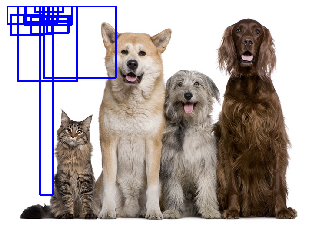

In [26]:
fig,ax = plt.subplots()
ax.imshow(plot_box(img,results))
ax.axis('off')

## Import hdc_v2 and co-register

In [ ]:
model_file_name = 'best-wiehgts-Model_2_2-057-0.314-0.870.hdf5'
chosen_model = load_model(os.path.join('best_models_hdc_v2',model_file_name))

In [ ]:
def HappyPrediction(img):
    crop_img = img[result[0]['topleft']['y']:result[0]['bottomright']['y'],result[0]['topleft']['x']:result[0]['bottomright']['x']]
    img_rows = 224
    img_cols = 224
    crop_img = cv2.resize(crop_img,(img_rows,img_cols)).astype('float32')
    crop_img /= 255
    crop_img = np.expand_dims(crop_img,axis=0)
    predict_rate = chosen_model.predict(crop_img)[0][0]
    if predict_rate >= 0.5:
        predict_class = 'happy'
    else: predict_class = 'sad'
    return predict_class,predict_rate


In [ ]:
happy_box_color = (255,0,0)
sad_box_color = (0,0,255)
txt_color = (255,255,255)

In [ ]:
fig, axes = plt.subplots(3, 2,figsize=(8*2, 6*3))
for ax,img_num in zip(axes.flatten(),range(1,7)):
    img = cv2.imread(os.path.join('custom_darkflow','test_images',str(img_num)+'.jpg'))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    result = tfnet.return_predict(img)
    for r in result:
        tl = (r['topleft']['x'], r['topleft']['y'])
        br = (r['bottomright']['x'], r['bottomright']['y'])
        label = r['label']
        if label == 'dog':     
#             conf = r['confidence'] # confidence of general dog detector
#             text = '{}({:.2f})'.format(label,conf)
            predict_class,predict_rate = HappyPrediction(img) # confidence of happy dog classifier
            text = '{}({:.3f})'.format(predict_class,predict_rate)
            (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN,2,5)[0]
            text_offset_x = tl[0]-3
            text_offset_y = tl[1]
            box_coords = ((text_offset_x, text_offset_y+10), (text_offset_x+text_width,text_offset_y-text_height-10))
            if predict_class == 'happy':
                box_color = happy_box_color
            else:
                box_color = sad_box_color
            img = cv2.rectangle(img, box_coords[0], box_coords[1], box_color, cv2.FILLED)
            img = cv2.rectangle(img,tl,br,box_color,thickness=4)
            img = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,txt_color,3)
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0)

## single example excution time

In [ ]:
%%timeit
img = cv2.imread(os.path.join('custom_darkflow','test_images','6.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
for r in result:
    tl = (r['topleft']['x'], r['topleft']['y'])
    br = (r['bottomright']['x'], r['bottomright']['y'])
    label = r['label']
    if label == 'dog':     
#             conf = r['confidence'] # confidence of general dog detector
#             text = '{}({:.2f})'.format(label,conf)
        predict_class,predict_rate = HappyPrediction(img) # confidence of happy dog classifier
        text = '{}({:.2f})'.format(predict_class,predict_rate)
        (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN,2,5)[0]
        text_offset_x = tl[0]-3
        text_offset_y = tl[1]
        box_coords = ((text_offset_x, text_offset_y+10), (text_offset_x+text_width,text_offset_y-text_height-10))
        if predict_class == 'happy':
            box_color = happy_box_color
        else:
            box_color = sad_box_color
        img = cv2.rectangle(img, box_coords[0], box_coords[1], box_color, cv2.FILLED)
        img = cv2.rectangle(img,tl,br,box_color,thickness=4)
        img = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,txt_color,3)
plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(left=0.2, wspace=0)

# for video input

In [ ]:
## only showing happy dogs ##
url = 'https://www.youtube.com/watch?v=0lEUiQEDUHM'
pa = pafy.new(url)
play = pa.getbest(preftype='webm')
cap = cv2.VideoCapture(play.url)

if (cap.isOpened() == False):
    print('cannot read a video')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('HDD_testing.avi',fourcc,20.0,(640,360))

while cap.isOpened():
    stime = time.time()
    ret,frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)
        result = tfnet.return_predict(frame)
        new_frame = np.copy(frame)
        for r in result:
            tl = (r['topleft']['x'], r['topleft']['y'])
            br = (r['bottomright']['x'], r['bottomright']['y'])
            label = r['label']
            if label == 'dog':
                predict_class,predict_rate = HappyPrediction(new_frame) # confidence of happy dog classifier
                if predict_class == 'happy':       
                    text = '{}({:.2f})'.format(predict_class,predict_rate)
                    box_color = happy_box_color
                    (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN,2,5)[0]
                    text_offset_x = tl[0]-3
                    text_offset_y = tl[1]
                    box_coords = ((text_offset_x, text_offset_y+10), (text_offset_x+text_width,text_offset_y-text_height-10))
                    new_frame = cv2.rectangle(new_frame, box_coords[0], box_coords[1], box_color, cv2.FILLED)
                    new_frame = cv2.rectangle(new_frame,tl,br,box_color,thickness=4)
                    new_frame = cv2.putText(new_frame,text,tl,cv2.FONT_HERSHEY_PLAIN,2,txt_color,3)
        fps = 1/(time.time()-stime)
        new_frame = cv2.putText(new_frame,'fps: '+format(fps, '.2f'),(0,15),cv2.FONT_HERSHEY_PLAIN,1,(0,0,0),2)
        out.write(new_frame)
        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()
out.release()


In [ ]:
url = 'https://www.youtube.com/watch?v=0lEUiQEDUHM'
pa = pafy.new(url)
play = pa.getbest(preftype='webm')
cap = cv2.VideoCapture(play.url)

if (cap.isOpened() == False):
    print('cannot read a video')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('HDD_testing.avi',fourcc,20.0,(640,360))

while cap.isOpened():
    stime = time.time()
    ret,frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)
        result = tfnet.return_predict(frame)
        new_frame = np.copy(frame)
        for r in result:
            tl = (r['topleft']['x'], r['topleft']['y'])
            br = (r['bottomright']['x'], r['bottomright']['y'])
            label = r['label']
            if label == 'dog':
                predict_class,predict_rate = HappyPrediction(new_frame) # confidence of happy dog classifier
                if predict_class == 'happy':       
                    text = '{}({:.2f})'.format(predict_class,predict_rate)
                    box_color = happy_box_color
                else:
                    text = '{}'.format(predict_class)
                    box_color = sad_box_color
                (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN,2,5)[0]
                text_offset_x = tl[0]-3
                text_offset_y = tl[1]
                box_coords = ((text_offset_x, text_offset_y+10), (text_offset_x+text_width,text_offset_y-text_height-10))
#                 if predict_class == 'happy':
#                     box_color = happy_box_color
#                 else:
#                     box_color = sad_box_color
                new_frame = cv2.rectangle(new_frame, box_coords[0], box_coords[1], box_color, cv2.FILLED)
                new_frame = cv2.rectangle(new_frame,tl,br,box_color,thickness=4)
                new_frame = cv2.putText(new_frame,text,tl,cv2.FONT_HERSHEY_PLAIN,2,txt_color,3)
        fps = 1/(time.time()-stime)
        new_frame = cv2.putText(new_frame,'fps: '+format(fps, '.2f'),(0,15),cv2.FONT_HERSHEY_PLAIN,1,(0,0,0),2)
        out.write(new_frame)
        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()
out.release()


## for webcam input

In [ ]:
# colors = (tuple(255*np.random.rand(3) for _ in range(10)))

In [ ]:
# capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH,1920)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT,1080)

In [ ]:
# while True:
#     stime = time.time()
#     ret,frame = capture.read()
    
#     if ret:
#         results = tfnet.return_predict(frame)
#         for color,r in zip(colors,results):
#             tl = (r['topleft']['x'], r['topleft']['y'])
#             br = (r['bottomright']['x'], r['bottomright']['y'])
#             label = r['label']
#             frame = cv2.rectangle(frame,tl,br,color,5)
#             frame = cv2.putText(frame,label,tl,cv2.FONT_HERSHEY_PLAIN,2,color,3)
#         cv2.imshow('frame',frame)
#         print('FPS {:.1f}'.format(1/(time.time()-stime)))
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# capture.release()
# cv2.destroyAllWindows()